In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\Tasla_Stock_Updated_V2.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Date        2274 non-null   object 
 2   Open        2274 non-null   float64
 3   High        2274 non-null   float64
 4   Low         2274 non-null   float64
 5   Close       2274 non-null   float64
 6   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 124.5+ KB


In [21]:
# Drop the unnecessary column and convert 'Date' to datetime
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.set_index('Date', inplace=True)
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2274 entries, 2015-01-02 to 2024-01-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2274 non-null   float64
 1   High    2274 non-null   float64
 2   Low     2274 non-null   float64
 3   Close   2274 non-null   float64
 4   Volume  2274 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.6 KB
None
              Open         High          Low        Close        Volume
count  2274.000000  2274.000000  2274.000000  2274.000000  2.274000e+03
mean    103.493730   105.771617   101.036327   103.461794  1.142089e+08
std     111.136174   113.606095   108.399966   111.032019  7.688430e+07
min       9.488000    10.331333     9.403333     9.578000  1.062000e+07
25%      16.669833    16.933332    16.468833    16.693666  6.637762e+07
50%      23.221334    23.554000    22.842334    23.197333  9.359855e+07
75%     215.272503   219.629173   208.983334   215.22749

In [49]:
df.describe()

,Open,High,Low,Close,Volume,MA7,MA21
count,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03,2268.000000,2254.000000
mean,103.493730,105.771617,101.036327,103.461794,1.142089e+08,103.418475,103.263713
std,111.136174,113.606095,108.399966,111.032019,7.688430e+07,110.877898,110.456381
min,9.488000,10.331333,9.403333,9.578000,1.062000e+07,10.087524,11.336984
25%,16.669833,16.933332,16.468833,16.693666,6.637762e+07,16.715024,16.682667
50%,23.221334,23.554000,22.842334,23.197333,9.359855e+07,23.098143,22.884238
75%,215.272503,219.629173,208.983334,215.227497,1.338214e+08,216.658572,218.419999
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,396.351907,373.554125


In [28]:
import matplotlib.pyplot as plt

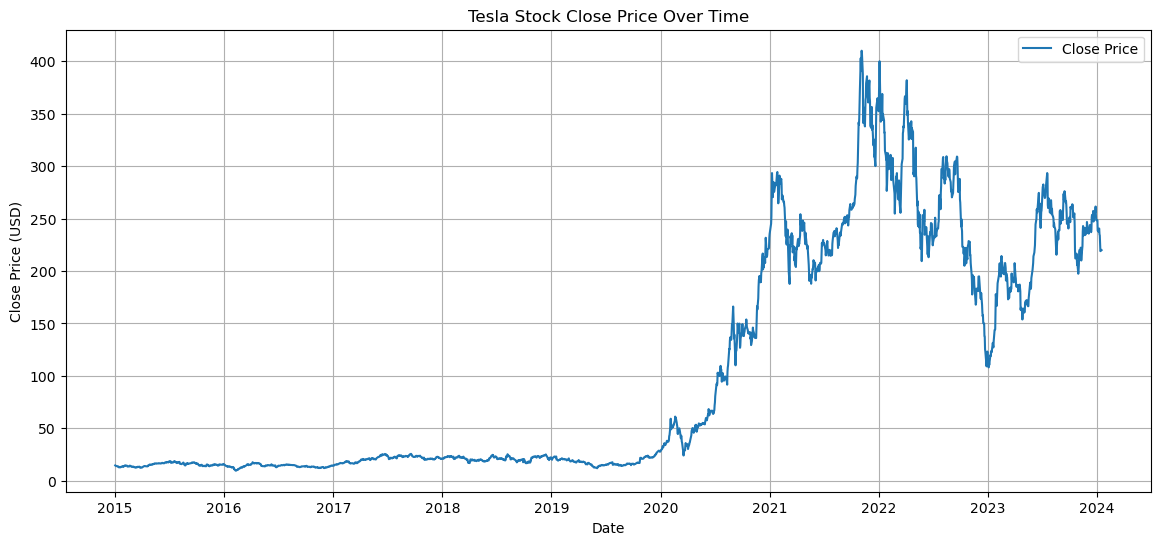

In [29]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title("Tesla Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

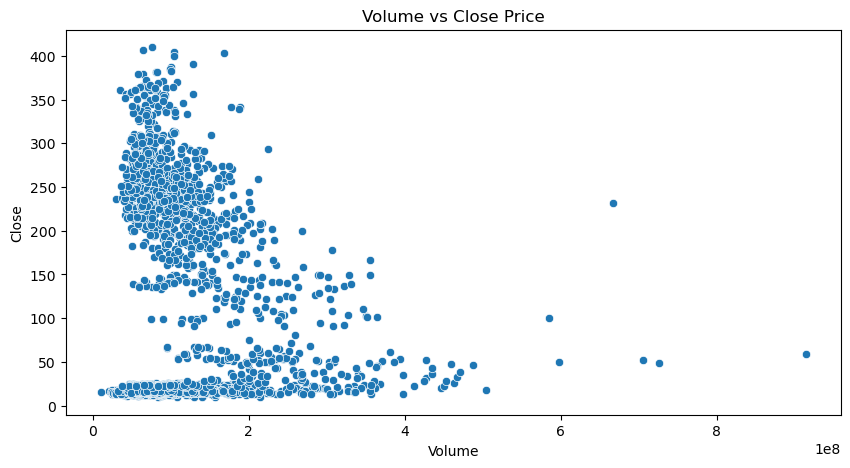

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title("Volume vs Close Price")
plt.show()

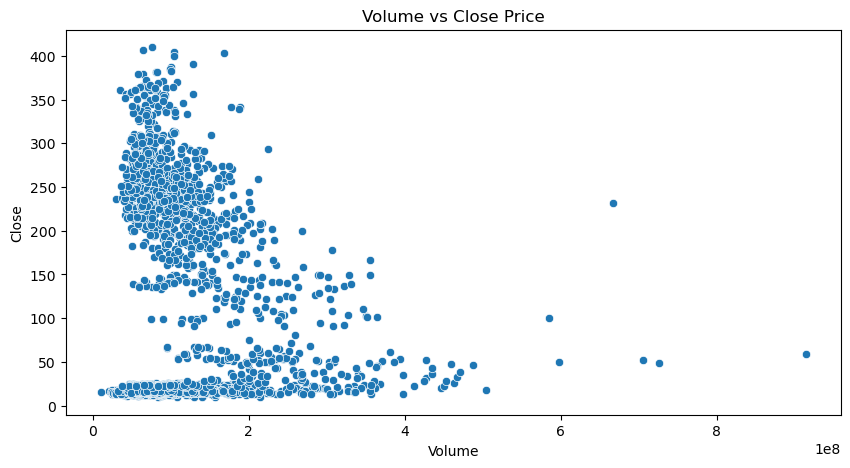

In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title("Volume vs Close Price")
plt.show()

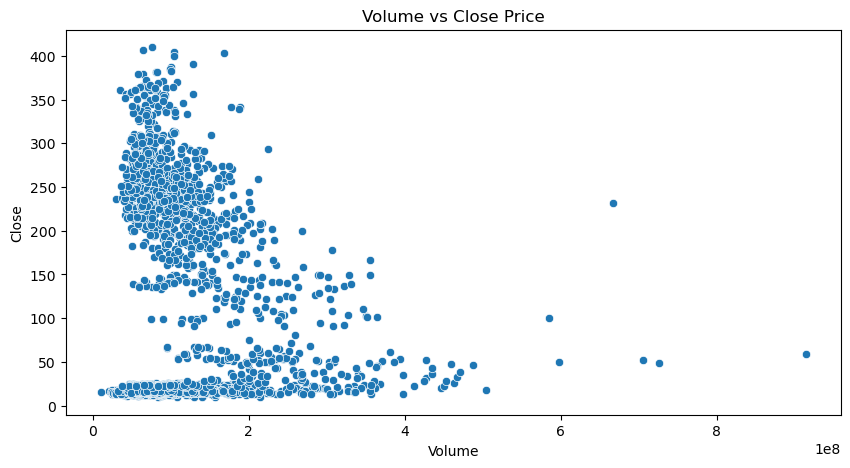

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title("Volume vs Close Price")
plt.show()

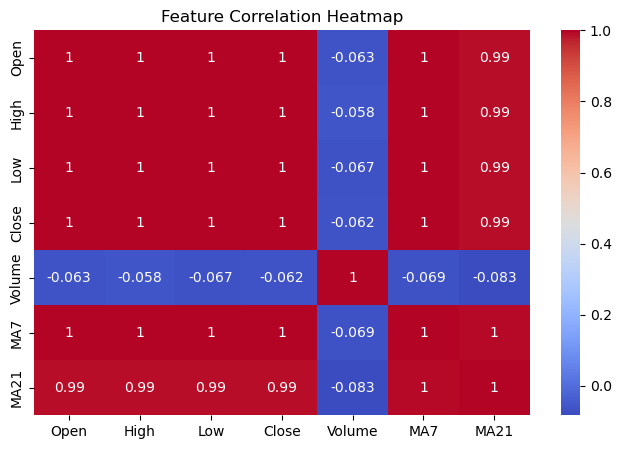

In [42]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#feature Engineering (Optional Moving Averages)

In [33]:
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()

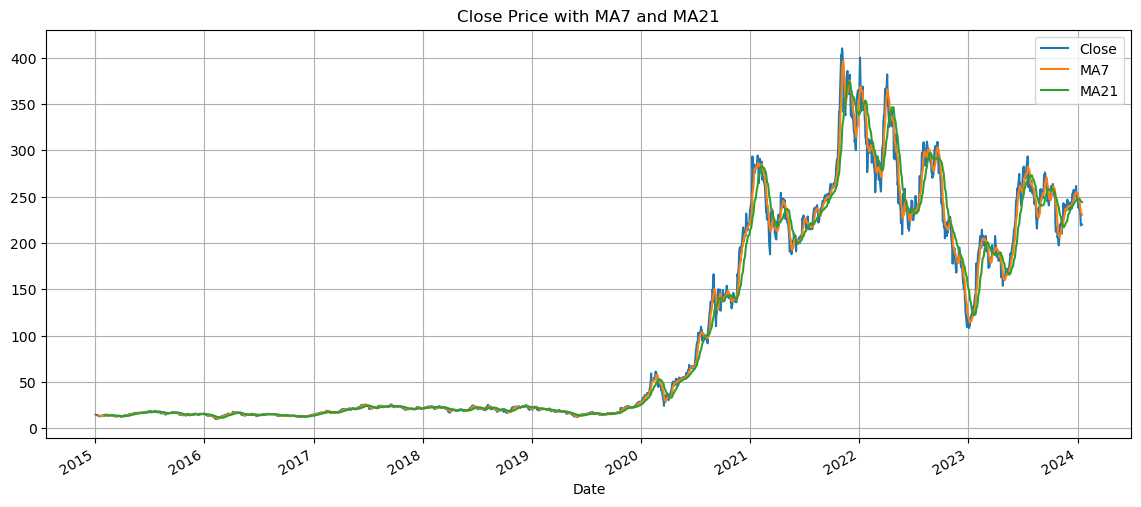

In [34]:
df[['Close', 'MA7', 'MA21']].plot(figsize=(14, 6), title='Close Price with MA7 and MA21')
plt.grid(True)
plt.show()

In [35]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

In [36]:
X = df[features]
y = df[target]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.996531918655725
RMSE: 3.019858078250005


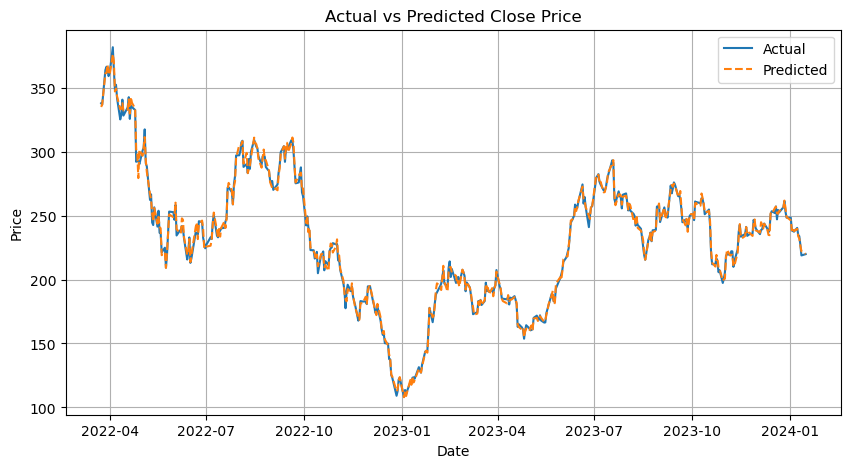

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title("Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Input features from 16-Jan-2024
next_input = pd.DataFrame([{
    'Open': 215.10,
    'High': 223.49,
    'Low': 212.18,
    'Volume': 115064708
}])

# Predict next day's close price
next_close_pred = model.predict(next_input)

print(f"📈 Predicted Close Price for 17-Jan-2024: ${next_close_pred[0]:.2f}")

📈 Predicted Close Price for 17-Jan-2024: $220.08


# Ensure 'Date' is a datetime and reset index
df_reset = df.reset_index()
df_reset['Date'] = pd.to_datetime(df_reset['Date'])

# Filter only 2025 data
df_2025 = df_reset[df_reset['Date'].dt.year == 2025].copy()

# Check if required columns are present
required_cols = ['Open', 'High', 'Low', 'Volume']
if not all(col in df_2025.columns for col in required_cols):
    raise ValueError("2025 data is missing required input columns.")

# Prepare features for prediction
X_2025 = df_2025[required_cols]

# Predict Close prices using trained model
df_2025['Predicted Close'] = model.predict(X_2025)

# Show first few predicted rows
print(df_2025[['Date', 'Open', 'High', 'Low', 'Volume', 'Predicted Close']].head(10))

In [47]:
import pandas as pd
import numpy as np

# 1. Simulate trading days for 2025
dates_2025 = pd.date_range(start="2025-01-01", end="2025-12-31", freq='B')  # 'B' = business day

# 2. Use last known values from 16-Jan-2024
last_row = {
    'Open': 215.10,
    'High': 223.49,
    'Low': 212.18,
    'Volume': 115064708
}

# 3. Generate fake 2025 features with small variations
np.random.seed(42)  # reproducibility
n_days = len(dates_2025)

open_vals = np.random.normal(last_row['Open'], 2, n_days)
high_vals = open_vals + np.random.normal(5, 1, n_days)
low_vals = open_vals - np.random.normal(5, 1, n_days)
volume_vals = np.random.normal(last_row['Volume'], 1e6, n_days).astype(int)

# 4. Create DataFrame
df_2025_simulated = pd.DataFrame({
    'Date': dates_2025,
    'Open': open_vals,
    'High': high_vals,
    'Low': low_vals,
    'Volume': volume_vals
})

# 5. Predict using trained Linear Regression model
X_2025 = df_2025_simulated[['Open', 'High', 'Low', 'Volume']]
df_2025_simulated['Predicted Close'] = model.predict(X_2025)

# 6. Preview predictions
print(df_2025_simulated[['Date', 'Open', 'High', 'Low', 'Volume', 'Predicted Close']].head(10))

        Date        Open        High         Low     Volume  Predicted Close
0 2025-01-01  216.093428  221.033903  211.756052  115675293       216.874481
1 2025-01-02  214.823471  216.582204  209.252873  115624498       211.795089
2 2025-01-03  216.395377  220.370989  212.158636  116145488       216.386778
3 2025-01-06  218.146060  222.893492  214.950942  115898630       219.632526
4 2025-01-07  214.631693  218.383910  211.259236  115523888       215.092151
5 2025-01-08  214.631726  221.264137  209.583641  114994542       216.386455
6 2025-01-09  218.258426  221.828284  212.998703  113403747       217.091629
7 2025-01-10  216.634869  221.194825  212.539186  115494326       217.259708
8 2025-01-13  214.161051  219.291792  208.522459  115272395       214.111222
9 2025-01-14  216.185120  222.626393  212.846640  115336286       219.085824


In [48]:
df_2025_simulated.to_excel("tesla_2025_simulated_predictions.xlsx", index=False)
print("✅ Simulated predictions saved as tesla_2025_simulated_predictions.xlsx")

✅ Simulated predictions saved as tesla_2025_simulated_predictions.xlsx


In [50]:
import pandas as pd

# Load the CSV
df = pd.read_csv(r"C:\Users\DELL\Downloads\Tasla_Stock_Updated_V2.csv")

# Clean unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# 1. Total Volume traded
total_volume = df['Volume'].sum()

# 2. Close price min/max
min_close = df['Close'].min()
max_close = df['Close'].max()

# 3. Overall min/max across all price columns
overall_min_price = df[['Open', 'High', 'Low', 'Close']].min().min()
overall_max_price = df[['Open', 'High', 'Low', 'Close']].max().max()

# 4. Date of highest High and lowest Low
highest_row = df[df['High'] == df['High'].max()]
lowest_row = df[df['Low'] == df['Low'].min()]

# Print results
print(f"📦 Total Volume Traded: {total_volume:,}")
print(f"📉 Minimum Close Price: ${min_close:.2f}")
print(f"📈 Maximum Close Price: ${max_close:.2f}")
print(f"🔽 Lowest Stock Value (any column): ${overall_min_price:.2f}")
print(f"🔼 Highest Stock Value (any column): ${overall_max_price:.2f}")
print("\n📅 Date of Highest High:")
print(highest_row[['Date', 'High']])

print("\n📅 Date of Lowest Low:")
print(lowest_row[['Date', 'Low']])

📦 Total Volume Traded: 259,710,929,708
📉 Minimum Close Price: $9.58
📈 Maximum Close Price: $409.97
🔽 Lowest Stock Value (any column): $9.40
🔼 Highest Stock Value (any column): $414.50

📅 Date of Highest High:
           Date        High
1723 2021-11-04  414.496674

📅 Date of Lowest Low:
          Date       Low
277 2016-02-09  9.403333
